In [2]:
##Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
LR_DF = pd.read_csv("LR_DF.csv")

In [4]:
LR_DF.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9.0
1,C10,1,41,M,84370.59,PROF,14,41-45,843,9.0
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26.0
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19.0
4,C10000,0,43,M,97100.48,NaN,3,41-45,397,8.0


In [5]:
#Summary statistics
LR_DF.describe(include = "all")
##LR_DF.dropna().describe()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
count,20000,20000.000000,20000.000000,20000,2.000000e+04,15360,20000.00000,20000,20000.000000,19000.000000
unique,20000,NaN,NaN,3,NaN,4,NaN,7,NaN,NaN
top,C19397,NaN,NaN,M,NaN,SAL,NaN,31-35,NaN,NaN
freq,1,NaN,NaN,14279,NaN,5908,NaN,3488,NaN,NaN
mean,NaN,0.044400,38.396200,NaN,1.461813e+05,NaN,16.61795,NaN,557.136050,15.199737
std,NaN,0.205987,9.600179,NaN,1.698125e+05,NaN,12.96995,NaN,260.521453,9.239180
min,NaN,0.000000,21.000000,NaN,0.000000e+00,NaN,0.00000,NaN,100.000000,0.000000
25%,NaN,0.000000,30.000000,NaN,2.373692e+04,NaN,7.00000,NaN,333.000000,7.000000
50%,NaN,0.000000,38.000000,NaN,7.975574e+04,NaN,13.00000,NaN,560.000000,15.000000
75%,NaN,0.000000,47.000000,NaN,2.173106e+05,NaN,21.00000,NaN,784.000000,23.000000


In [6]:
#Getting percentile distribution
LR_DF["Age"].quantile([0.01,0.05,0.1,
     0.25,0.5,0.75,0.9,0.95,0.99,1])

0.01    21.0
0.05    24.0
0.10    26.0
0.25    30.0
0.50    38.0
0.75    47.0
0.90    52.0
0.95    54.0
0.99    55.0
1.00    55.0
Name: Age, dtype: float64

In [7]:
#Getting percentile distribution for all numeric variables
##LR_DF.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]) this function does not work on missing
np.nanpercentile(LR_DF["Holding_Period"], np.arange(0, 101, 10))

array([ 0.,  2.,  6.,  9., 12., 15., 18., 21., 25., 28., 31.])

{'whiskers': [<matplotlib.lines.Line2D at 0x287200d8708>,
 'caps': [<matplotlib.lines.Line2D at 0x287200e1808>,
 'boxes': [<matplotlib.lines.Line2D at 0x287200d2ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x287200e8908>],
 'fliers': [<matplotlib.lines.Line2D at 0x287200e8a08>],
 'means': []}

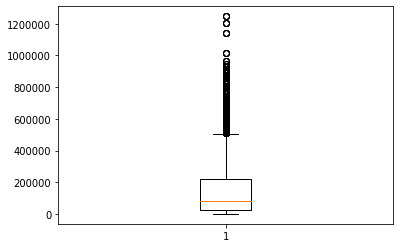

In [8]:
#Capping and Flooring
plt.boxplot(LR_DF["Balance"],0,'o')

In [9]:
#def outlier_treatment(x):
#    median, std = x.median(), x.std()
#    upper_outlier_value = median + 2 * std
#   lower_outlier_value = median - 2 * std
#  
#    upper_outlier_row_index = (x - median) > 2 * std
#    lower_outlier_row_index = (median - x) > 2 * std
#    
#    x[upper_outlier_row_index] = upper_outlier_value
#    x[lower_outlier_row_index] = lower_outlier_value
#    return x

#LR_DF["Bal_cap"] = outlier_treatment(LR_DF["Balance"])

LR_DF["Bal_cap"]=LR_DF["Balance"].map(lambda x: 560000 if x>560000 else x)

LR_DF["Bal_cap"].describe()

count     20000.000000
mean     141388.786708
std      153870.001950
min           0.000000
25%       23736.915000
50%       79755.745000
75%      217310.632500
max      560000.000000
Name: Bal_cap, dtype: float64

In [10]:
LR_DF["Balance"].describe()

count    2.000000e+04
mean     1.461813e+05
std      1.698125e+05
min      0.000000e+00
25%      2.373692e+04
50%      7.975574e+04
75%      2.173106e+05
max      1.246967e+06
Name: Balance, dtype: float64

In [11]:
LR_DF['decile'] = pd.qcut(LR_DF['Holding_Period'], 10, labels=False)

Rrate =  LR_DF.fillna(-1).groupby('decile').apply(lambda x: pd.Series([
        np.min(x['Holding_Period']),
        np.max(x['Holding_Period']),
        np.mean(x['Holding_Period']),
        np.size(x['Holding_Period']),
        np.sum(x['Target']),
        np.size(x['Target'][x['Target']==0]),
        ],
        index=(["min_HP","max_HP","avg_HP",
        "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()

Rrate["rrate"]=Rrate["cnt_resp"]*100/Rrate["cnt"]

In [12]:
Rrate

,decile,min_HP,max_HP,avg_HP,cnt,cnt_resp,cnt_non_resp,rrate
0,-1.0,-1.0,-1.0,-1.000000,1000.0,35.0,965.0,3.500000
1,0.0,0.0,2.0,0.993694,1903.0,175.0,1728.0,9.196006
2,1.0,3.0,6.0,4.524664,2453.0,185.0,2268.0,7.541786
3,2.0,7.0,9.0,8.004442,1801.0,113.0,1688.0,6.274292
4,3.0,10.0,12.0,10.979237,1782.0,87.0,1695.0,4.882155
5,4.0,13.0,15.0,14.039539,1821.0,78.0,1743.0,4.283361
6,5.0,16.0,18.0,17.001073,1864.0,73.0,1791.0,3.916309
7,6.0,19.0,21.0,19.992970,1707.0,34.0,1673.0,1.991798
8,7.0,22.0,25.0,23.532358,2256.0,54.0,2202.0,2.393617
9,8.0,26.0,28.0,27.014732,1697.0,28.0,1669.0,1.649971


In [13]:
(35 + 26) / (1716 + 1000)

0.022459499263622975

In [14]:
LR_DF["HP_Imputed"]=LR_DF["Holding_Period"].fillna(18)
LR_DF["HP_Imputed"].describe()

count    20000.000000
mean        15.339750
std          9.025885
min          0.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: HP_Imputed, dtype: float64

In [15]:
## Drop the decile column
LR_DF.drop(['decile'], axis = 1, inplace = True)

In [16]:
#Missing Value Imputation for Occupation
ctab = pd.crosstab(LR_DF["Occupation"].fillna(''),LR_DF["Target"] )
ctab['RRate'] = ctab[1] *100 / (ctab[1] + ctab[0])
ctab

Target,0,1,RRate
Occupation,,,
,4432,208,4.482759
PROF,5259,221,4.032847
SAL,5749,159,2.691266
SELF-EMP,2982,290,8.863081
SENP,690,10,1.428571


In [17]:
LR_DF["Occu_Imputed"]=LR_DF.Occupation.fillna("Missing")
LR_DF["Occu_Imputed"].value_counts()

SAL         5908
PROF        5480
Missing     4640
SELF-EMP    3272
SENP         700
Name: Occu_Imputed, dtype: int64

C:\Users\Vinay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Vinay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


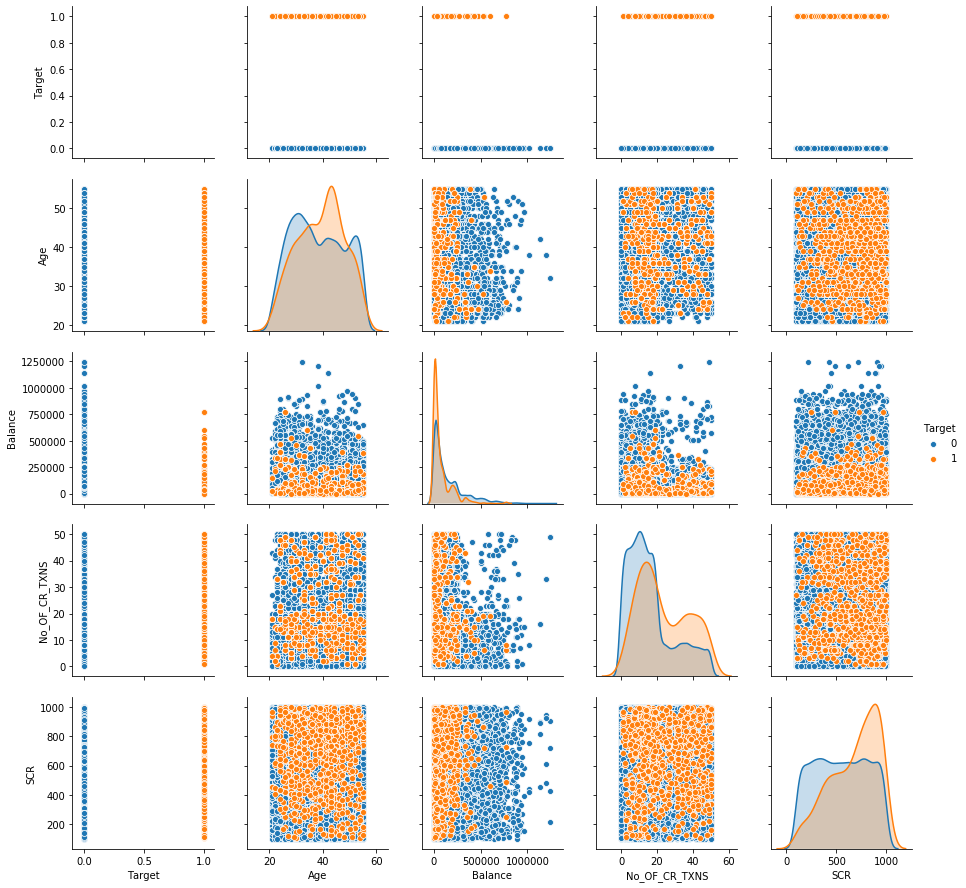

In [18]:
import seaborn as sns
sns.pairplot(LR_DF.iloc[:,1:9], hue = "Target", diag_kind="auto")

In [19]:
## Information Value
exec(open("D:\Python_Training\Py_Logistic_Regression\iv_function.py").read())
iv = information_value(df = LR_DF.iloc[:,1:],target = LR_DF.Target)
iv

C:\Users\Vinay\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,VAR_NAME,IV,BINS
0,No_OF_CR_TXNS,0.379058,9
1,Holding_Period,0.349119,13
2,HP_Imputed,0.349017,11
3,Bal_cap,0.296563,7
4,Balance,0.296563,7
5,SCR,0.272628,9
6,Occu_Imputed,0.220740,5
7,Occupation,0.220740,5
8,Age,0.102034,9
9,AGE_BKT,0.095657,7


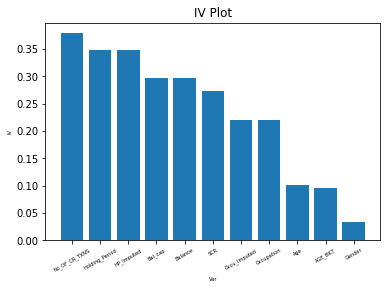

In [20]:
## Plotting the IV
index = np.arange(len(iv.VAR_NAME))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(iv.VAR_NAME))
    plt.bar(index, iv.IV)
    plt.xlabel('Var', fontsize=5)
    plt.ylabel('IV', fontsize=5)
    plt.xticks(index, iv.VAR_NAME, fontsize=5, rotation=30)
    plt.title('IV Plot')
    plt.show()

plot_bar_x()  

In [21]:
pd.crosstab(LR_DF['Occu_Imputed'].fillna(''), LR_DF['Target'])

Target,0,1
Occu_Imputed,,
Missing,4432,208
PROF,5259,221
SAL,5749,159
SELF-EMP,2982,290
SENP,690,10


In [22]:
## Visualization Code
ai = LR_DF.drop('Target',axis=1).select_dtypes([np.number]).columns
for i in ai:
    print(i)
    fn_biz_viz(LR_DF,i,"Target", 
               r".")

Age
Balance
No_OF_CR_TXNS
SCR
Holding_Period
Bal_cap
HP_Imputed


In [23]:
## Transforming Age Variable
LR_DF["DV_Age"]=LR_DF["Age"].map(lambda
         x: 43-(x-43) if x>43 else x)


In [24]:
## Other approach of writing the above code
LR_DF["dv_age"] = [y if y < 43 else (43 - (y - 43)) for y in LR_DF["Age"]]
LR_DF["dv_age"] = np.where(LR_DF["Age"] < 43, LR_DF["Age"], 
     43 - (LR_DF["Age"] - 43))

In [25]:
#Model development
#spliting into development, validation and hold-out sample
mydata = LR_DF.copy()
mydata_dev, mydata_val, mydata_holdout = np.split(
        mydata.sample(frac=1, random_state=1212), 
        [int(.5*len(mydata)), 
         int(.8*len(mydata))]
        )

(len(mydata_dev), len(mydata_val), len(mydata_holdout))



(10000, 6000, 4000)

In [26]:
print(round(sum(mydata_dev.Target)*100/len(mydata_dev),1),
    round(sum(mydata_val.Target)*100/len(mydata_val),1),
    round(sum(mydata_holdout.Target)*100/len(mydata_holdout),1))


4.3 4.8 4.2


In [27]:
#Importing the required Packages
import statsmodels.formula.api as sm
import statsmodels.api
## Running one variable Logistic Regression
mylogit = sm.glm(formula = "Target~ Age" , data = mydata_dev,
                    family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1784.3
Date:                Wed, 25 Mar 2020   Deviance:                       3568.5
Time:                        11:21:21   Pearson chi2:                 9.99e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4643      0.206    -16.812      0.000      -3.868      -3.060
Age            0.0096      0.005      1.875      0.061      -0.000       0.020
==============================================================================
"""

In [28]:
mylogit = sm.glm(formula = "Target~ DV_Age" , data = mydata_dev,
                    family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1768.8
Date:                Wed, 25 Mar 2020   Deviance:                       3537.5
Time:                        11:21:21   Pearson chi2:                 1.00e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9389      0.332    -14.894      0.000      -5.589      -4.289
DV_Age         0.0532      0.009      5.745      0.000       0.035       0.071
==============================================================================
"""

In [29]:
## Running regression with all the variables
mylogit = sm.glm(formula = """Target~ DV_Age + Gender + SCR + Bal_cap 
        + No_OF_CR_TXNS + Occu_Imputed + HP_Imputed""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1498.5
Date:                Wed, 25 Mar 2020   Deviance:                       2997.0
Time:                        11:21:22   Pearson chi2:                 1.14e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.5268      0.409    -11.066      0.000      -5.329      -3.725
Gender[T.M]                  0.2280      0.137      1.665      0.096      -0.040       0.496
Gender[T.O]                 -0.2720      0.553     -0.492      0.623      -1.355       0.812
Occu_Imputed[T.PROF]        -0.8580      0.157     -5.474      0.000      -1.165      -0.551
Occu_Imputed[T.SAL]         -1.4622      0.172     -8.511      0.000      -1.799      -1.125
Occu_Imputed[T.SELF-EMP]     0.1360      0.146      0.932      0.352      -0.150       0.422
Occu_Imputed[T.SENP]        -1.6482      0.435     -3.786      0.000      -2.501      -0.795
DV_Age                       0.0334      0.010      3.350      0.001       0.014       0.053
SCR                          0.0019      0.000      8.914      0.000       0.001       0.002
Bal_cap                  -3.991e-06   5.38e-07     -7.424      0.000   -5.04e-06   -2.94e-06
No_OF_CR_TXNS                0.0404      0.004     10.368      0.000       0.033       0.048
HP_Imputed                  -0.0629      0.006    -10.382      0.000      -0.075      -0.051
============================================================================================
"""

In [30]:
## Dropping Gender Variable
mylogit = sm.glm(formula = """Target~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + Occu_Imputed + HP_Imputed""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1500.4
Date:                Wed, 25 Mar 2020   Deviance:                       3000.7
Time:                        11:21:22   Pearson chi2:                 1.13e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.4111      0.401    -10.988      0.000      -5.198      -3.624
Occu_Imputed[T.PROF]        -0.8325      0.155     -5.354      0.000      -1.137      -0.528
Occu_Imputed[T.SAL]         -1.4142      0.170     -8.331      0.000      -1.747      -1.081
Occu_Imputed[T.SELF-EMP]     0.1685      0.144      1.168      0.243      -0.114       0.451
Occu_Imputed[T.SENP]        -1.6264      0.435     -3.742      0.000      -2.478      -0.774
DV_Age                       0.0339      0.010      3.411      0.001       0.014       0.053
SCR                          0.0019      0.000      8.920      0.000       0.001       0.002
Bal_cap                  -4.041e-06   5.35e-07     -7.552      0.000   -5.09e-06   -2.99e-06
No_OF_CR_TXNS                0.0414      0.004     10.837      0.000       0.034       0.049
HP_Imputed                  -0.0634      0.006    -10.453      0.000      -0.075      -0.051
============================================================================================
"""

In [31]:
## Transforming Occupation Variable
ctab = pd.crosstab(mydata_dev["Occupation"].fillna(''),mydata_dev["Target"] )
ctab['RRate'] = ctab[1] *100 / (ctab[1] + ctab[0])
ctab

Target,0,1,RRate
Occupation,,,
,2241,107,4.557070
PROF,2641,99,3.613139
SAL,2873,78,2.643172
SELF-EMP,1466,144,8.944099
SENP,345,6,1.709402


In [32]:
mydata_dev["occ_recat"]=mydata_dev["Occupation"].map(lambda
         x: "PROF_MISSING" if (pd.isnull(x) or x == "PROF")
         else ("SAL_SENP" if (x == "SAL" or x == "SENP")
         else "SELF-EMP"))
mydata_dev['occ_recat'].value_counts()


PROF_MISSING    5088
SAL_SENP        3302
SELF-EMP        1610
Name: occ_recat, dtype: int64

In [33]:
## Other style of coding is given below
def occ_function (row):
    if (pd.isnull(row['Occupation']) or row['Occupation'] == "PROF"):
        return "PROF_MISSING"
    elif (row['Occupation'] == "SAL" or row['Occupation'] == "SENP"):
        return "SAL_SENP" 
    else: return row['Occupation']

mydata_dev['occ_recat2'] = mydata_dev.apply (
        lambda row: occ_function(row),axis=1)
mydata_dev['occ_recat2'].value_counts()

PROF_MISSING    5088
SAL_SENP        3302
SELF-EMP        1610
Name: occ_recat2, dtype: int64

In [34]:
mylogit = sm.glm(formula = """Target ~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + occ_recat + HP_Imputed""" , 
        data = mydata_dev, family=statsmodels.api.families.Binomial()).fit()
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1514.9
Date:                Wed, 25 Mar 2020   Deviance:                       3029.8
Time:                        11:21:23   Pearson chi2:                 1.13e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.7652      0.399    -11.955      0.000      -5.546      -3.984
occ_recat[T.SAL_SENP]    -0.9041      0.138     -6.537      0.000      -1.175      -0.633
occ_recat[T.SELF-EMP]     0.6564      0.118      5.541      0.000       0.424       0.889
DV_Age                    0.0327      0.010      3.288      0.001       0.013       0.052
SCR                       0.0019      0.000      9.019      0.000       0.001       0.002
Bal_cap               -3.803e-06   5.28e-07     -7.197      0.000   -4.84e-06   -2.77e-06
No_OF_CR_TXNS             0.0360      0.004     10.022      0.000       0.029       0.043
HP_Imputed               -0.0632      0.006    -10.432      0.000      -0.075      -0.051
=========================================================================================
"""

In [35]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Target ~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + occ_recat + HP_Imputed""",mydata_dev)
vif     

,Variable,VIF
0,Intercept,51.1
1,occ_recat[T.SAL_SENP],1.2
2,occ_recat[T.SELF-EMP],1.1
3,DV_Age,1.0
4,SCR,1.0
5,Bal_cap,1.1
6,No_OF_CR_TXNS,1.1
7,HP_Imputed,1.0


In [36]:
## Predicting Probabilities
mydata_dev["prob"] = mylogit.predict(mydata_dev)

In [37]:
## Classification
mydata_dev.prob.quantile(
  [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

mydata_dev["class"] = mydata_dev["prob"].map(
        lambda x: 1 if x > mydata_dev.prob.quantile(0.956) else 0)


In [38]:
mydata_dev['decile']=pd.qcut(mydata_dev.prob, 10, labels=False)
## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)


RRate = Response_Rate(mydata_dev,"prob","Target")
RRate



,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9,0.103465,0.571987,0.181296,1000.0,197.0,803.0,19.7,197.0,803.0,45.39,8.39,37.00
8,8,0.063057,0.103449,0.080321,1000.0,72.0,928.0,7.2,269.0,1731.0,61.98,18.10,43.88
7,7,0.043946,0.063055,0.052422,1000.0,41.0,959.0,4.1,310.0,2690.0,71.43,28.12,43.31
6,6,0.031878,0.043939,0.037424,1000.0,35.0,965.0,3.5,345.0,3655.0,79.49,38.21,41.28
5,5,0.023733,0.031865,0.027530,1000.0,22.0,978.0,2.2,367.0,4633.0,84.56,48.43,36.13
4,4,0.017208,0.023717,0.020341,1000.0,26.0,974.0,2.6,393.0,5607.0,90.55,58.61,31.94
3,3,0.012521,0.017204,0.014779,1000.0,15.0,985.0,1.5,408.0,6592.0,94.01,68.91,25.10
2,2,0.008411,0.012517,0.010379,1000.0,9.0,991.0,0.9,417.0,7583.0,96.08,79.27,16.81
1,1,0.004720,0.008405,0.006526,1000.0,13.0,987.0,1.3,430.0,8570.0,99.08,89.59,9.49
0,0,0.000263,0.004720,0.002982,1000.0,4.0,996.0,0.4,434.0,9566.0,100.00,100.00,0.00


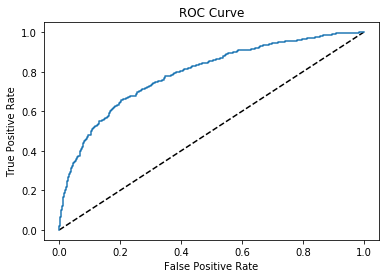

0.45326188854342997

In [39]:
#Roc_Curve and KS
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(mydata_dev["Target"],mydata_dev["prob"] )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

KS = (tpr - fpr).max()
KS

In [40]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(mydata_dev["Target"],mydata_dev["prob"])
auc

0.7911292490396575

In [41]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(mydata_dev.Target,mydata_dev["class"]),
     "accuracy": accuracy_score(mydata_dev.Target,mydata_dev["class"])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )


confusion matrix 
 [[9248  318]
 [ 312  122]] 

classification accuracy  0.937


In [42]:
#Hosmer-Lemeshow Goodness of Fit
def chisq(data,groupby,obs,Exp):
    chisq_tbl=data.groupby(groupby).apply(lambda x: pd.Series([
        np.size(x[obs]),
        np.size(x[Exp][x[Exp]==1]),
        np.size(x[Exp][x[Exp]==0]),   
        np.sum(x[obs]),
        (np.sum(1-x[obs]))      
        ],
        index=(["cnt", "Obs_Resp", "Obs_Non_resp", "Exp_Resp", "Exp_Non_Resp"])
        )).reset_index()
    chisq_tbl=chisq_tbl.sort_values(by=groupby,ascending=False)
    chisq_value = (
        ((chisq_tbl["Obs_Resp"]-chisq_tbl["Exp_Resp"])**2
              /chisq_tbl["Exp_Resp"])+
        ((chisq_tbl["Obs_Non_resp"]-chisq_tbl["Exp_Non_Resp"])**2
              /chisq_tbl["Exp_Non_Resp"])).sum()
    
    g = len(mydata_dev.decile.value_counts())
    
    import scipy
    pvalue=scipy.stats.chi2.pdf(chisq_value , g-2)
    return({"Chisq_Table":chisq_tbl,
            "hosmerlem": {"degree_of_freedom": g-2,
                          "X^2":round(chisq_value,2),
                          "p_value":pvalue}})

chisq_test = chisq(mydata_dev, "decile", "prob", "Target")
##chisq_test["Chisq_Table"]
chisq_test["hosmerlem"]

{'degree_of_freedom': 8, 'X^2': 15.14, 'p_value': 0.01864524880317405}

In [43]:
#Gini inequality
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

gini_coeff = gini(mydata_dev["prob"])
gini_coeff


0.5680700714128318

In [44]:
## This code takes too long to execute...as such it is completely commented
#Concordance
#def concordance(y , yhat):
#    Con_Dis_Data = pd.DataFrame()
#    Con_Dis_Data["y"] = y
#    Con_Dis_Data["yhat"] = yhat
#    ones = Con_Dis_Data[Con_Dis_Data["y"] == 1] 
#    zeros = Con_Dis_Data[Con_Dis_Data["y"] == 0] 
#    conc=np.zeros([len(zeros),len(ones)]) 
#    disc=np.zeros([len(zeros),len(ones)]) 
#    ties=np.zeros([len(zeros),len(ones)]) 
#    for j in range(len(zeros)):
#        for i in range(len(ones)):
#            if (ones.iloc[i,1]>zeros.iloc[j,1]):
#                conc[j,i]=1 
#            elif (ones.iloc[i,1]<zeros.iloc[j,1]): 
#                disc[j,i]=1 
#            elif (ones.iloc[i,1]==zeros.iloc[j,1]): 
#                ties[j,i]=1 
#    Pairs=len(zeros)*len(ones) 
#    PercentConcordance=((conc)/Pairs).sum()*100 
#    PercentDiscordance=((disc)/Pairs).sum()*100 
#    PercentTied=((ties)/Pairs).sum()*100 
#    return({"PercentConcordance":PercentConcordance,
#            "PercentDiscordance":PercentDiscordance,
#           "PercentTied":PercentTied,
#            "Pairs":Pairs})
#
#concordance(mydata_dev.Target, mydata_dev.prob)

In [45]:
## Model Validation
mydata_val["occ_recat"] = mydata_val["Occupation"].map(lambda
         x: "PROF_MISSING" if (pd.isnull(x) or x == "PROF")
         else ("SAL_SENP" if (x == "SAL" or x == "SENP")
         else "SELF-EMP"))
mydata_val['occ_recat'].value_counts()


PROF_MISSING    3031
SAL_SENP        1978
SELF-EMP         991
Name: occ_recat, dtype: int64

In [46]:
mylogit_val = sm.glm(formula = """Target ~ DV_Age + SCR + Bal_cap 
        + No_OF_CR_TXNS + occ_recat + HP_Imputed""" , 
        data = mydata_val, family=statsmodels.api.families.Binomial()).fit()
mylogit_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6000
Model:                            GLM   Df Residuals:                     5992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -974.43
Date:                Wed, 25 Mar 2020   Deviance:                       1948.9
Time:                        11:21:45   Pearson chi2:                 5.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -5.4153      0.501    -10.813      0.000      -6.397      -4.434
occ_recat[T.SAL_SENP]    -1.0562      0.173     -6.120      0.000      -1.394      -0.718
occ_recat[T.SELF-EMP]     0.4444      0.148      3.000      0.003       0.154       0.735
DV_Age                    0.0431      0.012      3.569      0.000       0.019       0.067
SCR                       0.0021      0.000      7.822      0.000       0.002       0.003
Bal_cap               -2.698e-06   6.01e-07     -4.488      0.000   -3.88e-06   -1.52e-06
No_OF_CR_TXNS             0.0453      0.005      9.960      0.000       0.036       0.054
HP_Imputed               -0.0615      0.008     -8.188      0.000      -0.076      -0.047
=========================================================================================
"""

In [47]:
## Development Model Summary
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1514.9
Date:                Wed, 25 Mar 2020   Deviance:                       3029.8
Time:                        11:21:45   Pearson chi2:                 1.13e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.7652      0.399    -11.955      0.000      -5.546      -3.984
occ_recat[T.SAL_SENP]    -0.9041      0.138     -6.537      0.000      -1.175      -0.633
occ_recat[T.SELF-EMP]     0.6564      0.118      5.541      0.000       0.424       0.889
DV_Age                    0.0327      0.010      3.288      0.001       0.013       0.052
SCR                       0.0019      0.000      9.019      0.000       0.001       0.002
Bal_cap               -3.803e-06   5.28e-07     -7.197      0.000   -4.84e-06   -2.77e-06
No_OF_CR_TXNS             0.0360      0.004     10.022      0.000       0.029       0.043
HP_Imputed               -0.0632      0.006    -10.432      0.000      -0.075      -0.051
=========================================================================================
"""

In [ ]:
mydata_dev["occ_woe"]=mydata_dev["Occu_Imputed"].map(lambda
x: -19.087 if (x == "PROF")
else (-51.348 if (x == "SAL")
else (-95.886 if (x == "SENP")
else (77.24 if (x == "SELF-EMP")
else 5.1077
))))

mydata_dev['occ_woe'].value_counts()